In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eq_time = 1
start_time = 200 #mu s
stop_time = 500 #mu s
dt  = 25 # ps

folder = "./run/sim_epsAB_day17_mon4-"

irc_df = pd.read_csv(f"{folder}IRC_AB.txt")
eps_df = pd.read_csv(f"{folder}EPS_AB.txt")

derivatives = -(irc_df - irc_df.mean())*(eps_df - eps_df.mean())


start_step = int((eq_time+start_time)*1000/(dt/1000))
stop_step = int((eq_time+stop_time)*1000/(dt/1000))

start_index = np.argmin(np.abs(irc_df["Step"].values - start_step))
stop_index = np.argmin(np.abs(irc_df["Step"].values - stop_step))

print(start_index)
print(stop_index)

#mean_pair_numbers = derivatives.loc[start_index:stop_index-1].mean()
derivatives.loc[start_index:stop_index-1]

37499
124999


Step  UL100-UL100  UL25-UL100   UL82-UL100   UL83-UL100  \
37499  -1.960022e+14    43.681572  535.998692   897.862050  1033.198302   
37500  -1.959978e+14   783.375756   95.557953  5773.368735   682.382036   
37501  -1.959933e+14   457.469913   26.136297    29.105834   248.574925   
37502  -1.959888e+14   578.257923  358.871309    31.330720   214.979773   
37503  -1.959843e+14   102.855298   12.793606   664.233793   -65.022240   
...              ...          ...         ...          ...          ...   
124994 -7.744000e+05    -8.216512    8.565352  2284.705214   220.905666   
124995 -5.184000e+05   140.383003  409.067225  1864.503714     2.084688   
124996 -3.136000e+05   109.306631   18.735651  -328.445790    34.228981   
124997 -1.600000e+05   104.510968   -2.608696   -45.912127   -33.280751   
124998 -5.760000e+04    76.759685   15.506240  1707.484895  -103.093698   

           UL25-UL25     UL82-UL25   UL83-UL25    UL82-UL82    UL83-UL82  \
37499    6232.909236  13859.535016  -87.207770    11.853917  -174.125208   
37500   13920.358853  23042.822045  258.459299  -672.171074  1864.814965   
37501   14805.087144   8408.305668   17.113182  -131.691198   152.823269   
37502   12428.059271   4807.832351  399.236844   601.602995  3786.916179   
37503   18439.520366    126.151152  189.796017   721.078149  2631.829580   
...              ...           ...         ...          ...          ...   
124994   8172.904851   3111.647924    0.958837     3.186379  -134.711044   
124995   6545.587287  10099.918445  512.779726  3183.081083  3344.819694   
124996   2735.725067   -221.688589  177.445150  3536.805743  5535.247214   
124997   4169.281369    123.438200   22.767803   932.014641    65.460105   
124998    256.593248   4261.257967  471.357669  1457.923522   437.036096   

           UL83-UL83  
37499   15450.157039  
37500   19953.240626  
37501    8481.513033  
37502    2216.844523  
37503    -115.874535  
...              ...  
124994    -26.207395  
124995   1333.315394  
124996  -1287.822091  
124997    -59.451437  
124998   -207.179545  

[87500 rows x 11 columns]

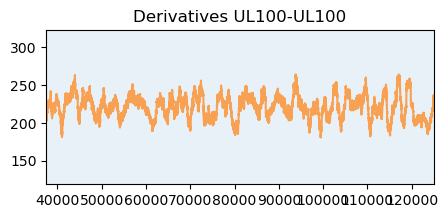

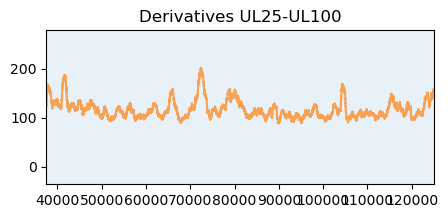

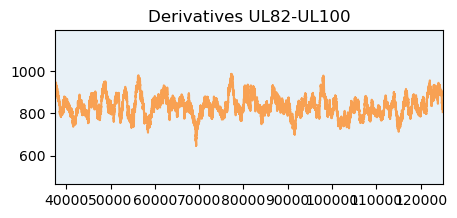

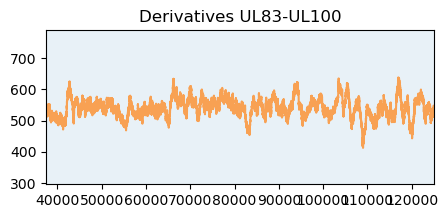

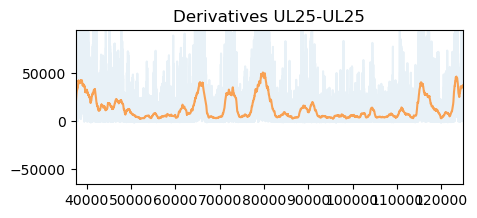

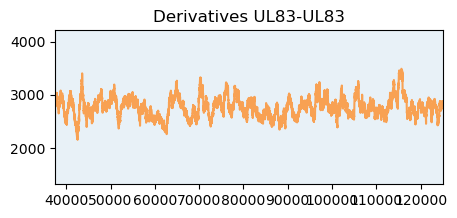

In [30]:
# this small script serves to indentify out of equilibrium pair numbers

smoothing_para = 1000
max_dev = 0.00005

for key in derivatives.columns:
    if key == "Step":
        continue
    first_ten = derivatives[key][:len(derivatives)//10].mean()
    last_ten = derivatives[key][(len(derivatives) - len(derivatives)//10):].mean()
    
    rel_dev = np.abs(first_ten/last_ten - 1)
    if rel_dev > max_dev:
        number_array = derivatives[key]
        smoothed_array = np.convolve(number_array.values, (1/smoothing_para)*np.ones(smoothing_para), mode="same")
        
        plt.figure(figsize=[5, 2])
        plt.title("Derivatives " + key)
        plt.plot(number_array, label="raw", alpha=0.1)
        plt.plot(smoothed_array, label="smoothed", alpha=0.7)
        smoth_std = smoothed_array.std()
        smoth_mean = smoothed_array.mean()
        
        plt.ylim([smoth_mean- 7*smoth_std, smoth_mean+ 7*smoth_std])
        plt.xlim([start_index, stop_index])
        plt.show()

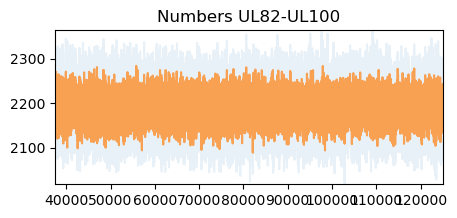

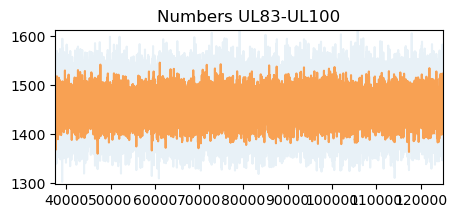

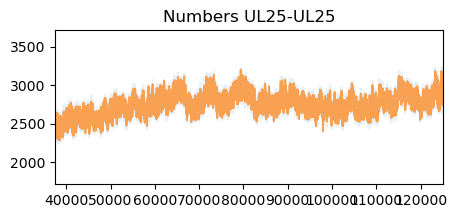

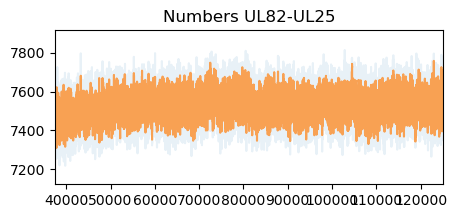

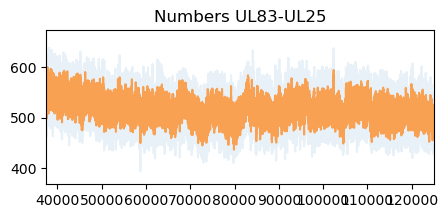

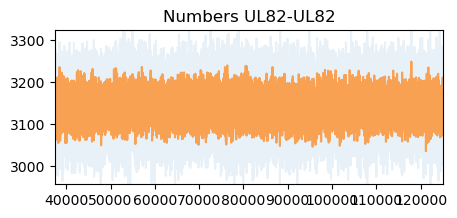

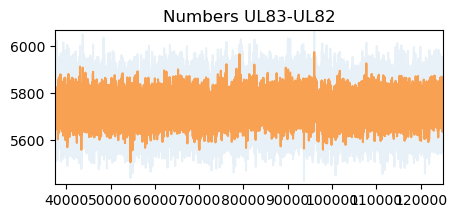

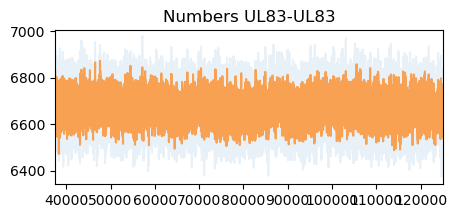

In [31]:
# this small script serves to indentify out of equilibrium pair numbers

smoothing_para = 5
max_dev = 0.00005

for key in eps_df.columns:
    if key == "Step":
        continue
    first_ten = derivatives[key][:len(derivatives)//10].mean()
    last_ten = derivatives[key][(len(derivatives) - len(derivatives)//10):].mean()
    
    rel_dev = np.abs(first_ten/last_ten - 1)
    if rel_dev > max_dev:
        number_array = irc_df[key]
        smoothed_array = np.convolve(number_array.values, (1/smoothing_para)*np.ones(smoothing_para), mode="same")
        
        plt.figure(figsize=[5, 2])
        plt.title("Numbers " + key)
        plt.plot(number_array, label="raw", alpha=0.1)
        plt.plot(smoothed_array, label="smoothed", alpha=0.7)
        smoth_std = smoothed_array.std()
        smoth_mean = smoothed_array.mean()
        
        plt.ylim([smoth_mean- 7*smoth_std, smoth_mean+ 7*smoth_std])
        plt.xlim([start_index, stop_index])
        plt.show()

In [28]:
ff_df = pd.read_csv("./exampleFF_DF.csv", index_col=0)
ff_df["N_pairs"] = None
ff_df["N_pair_std"] = None
ff_df["ref_eps"] = None
mean_pair_numbers = irc_df[start_index:stop_index].mean()
err_pair_numbers = irc_df[start_index:stop_index].std()

for i, row in ff_df.iterrows():
    pair_keya = row["ProteinA"] + "-" + row["ProteinB"]
    
    ff_df.loc[i,"ref_eps"] = row["Eps_AB"]
    ff_df.loc[i,"N_pairs"] = mean_pair_numbers[pair_keya]
    ff_df.loc[i,"N_pair_std"] = err_pair_numbers[pair_keya]

ff_df["Eps_AB"] = 0.
ff_df

ProteinA ProteinB  Eps_AB      N_pairs  N_pair_std   ref_eps
0     UL83    UL100     0.0  1455.035987   38.017752  -2.16073
1     UL83     UL25     0.0   513.003933   26.634273 -3.993441
2     UL83     UL82     0.0  5739.160933   74.325922 -2.253403
3     UL83     UL83     0.0   6669.28872   71.855113 -0.809791
4     UL82    UL100     0.0  2190.185853   41.465596 -1.298799
5     UL82     UL25     0.0   7533.06416   70.162864  0.431794
6     UL82     UL82     0.0  3141.989667   48.794464 -3.106198
7     UL25    UL100     0.0   266.781973   18.145138 -2.308524
8     UL25     UL25     0.0   2779.34672  115.031615  0.557606
9    UL100    UL100     0.0   388.951813   19.312856 -0.623422

In [19]:
ff_df.to_csv("testReferenceFF_df.csv")

In [15]:
ff_df

ProteinA ProteinB  Eps_AB      N_pairs  N_pair_std   ref_eps
0     UL83    UL100     0.0  1455.153693   38.141337  -2.16073
1     UL83     UL25     0.0   520.804523   29.537778 -3.993441
2     UL83     UL82     0.0  5739.648667   74.183707 -2.253403
3     UL83     UL83     0.0  6673.420514   71.797403 -0.809791
4     UL82    UL100     0.0  2190.814159   41.370728 -1.298799
5     UL82     UL25     0.0  7519.241609   73.184558  0.431794
6     UL82     UL82     0.0  3140.734871   48.909818 -3.106198
7     UL25    UL100     0.0   270.753363   19.105922 -2.308524
8     UL25     UL25     0.0  2711.439066  147.202958  0.557606
9    UL100    UL100     0.0    388.87596   19.303105 -0.623422